In [1]:
import os

from utils.auxiliary_func import *
from utils.data_func import *
from utils.plots_func import *
import config.const as const

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


### Lifetime correltion with another feature

In [2]:
# df_file_path = os.path.join(const.full_tissue_dir, 'core', "FLIM_features_full_tissue_with_mae.csv")
df_file_path = os.path.join(const.full_tissue_dir, 'core', "FLIM_features_full_tissue.csv")

full_tissue_features_df = pd.read_csv(df_file_path, dtype = {'leap_ID': str})
print(full_tissue_features_df.shape)
full_tissue_features_df.head()

(7603779, 22)


,leap_ID,nucleus_label,X coordinate,Y coordinate,lifetime_mean,area,extent,solidity,perimeter,diameter_area,...,perimeter_crofton,major_axis_length,orientation,diameter_max,eccentricity,density_radius_20,density_radius_40,density_radius_60,density_radius_80,category
0,032,1,1335.169231,2723.292308,2.720446,65.0,0.722222,0.928571,28.142136,9.097284,...,29.361935,9.406879,0.891890,10.440307,0.318169,0.008754,0.011539,0.009991,0.008555,non responder
1,032,2,1117.571429,3347.375000,2.923679,56.0,0.777778,0.949153,25.313708,8.444016,...,26.680418,8.962899,-0.572409,9.848858,0.467670,0.022282,0.019695,0.017861,0.015766,non responder
2,032,3,1234.854167,3566.583333,1.771021,48.0,0.888889,1.000000,23.071068,7.817640,...,24.554261,9.510037,1.475704,9.486833,0.741052,0.015915,0.017507,0.017330,0.016015,non responder
3,032,4,1043.071429,2489.428571,3.386071,14.0,0.700000,0.875000,11.656854,4.222008,...,13.732908,4.762643,-1.209092,5.099020,0.608034,0.010345,0.007958,0.006720,0.006565,non responder
4,032,5,670.118644,3978.237288,2.304644,59.0,0.737500,0.967213,26.142136,8.667245,...,27.465816,9.526111,-1.185587,10.440307,0.553210,0.006366,0.010743,0.010522,0.010693,non responder


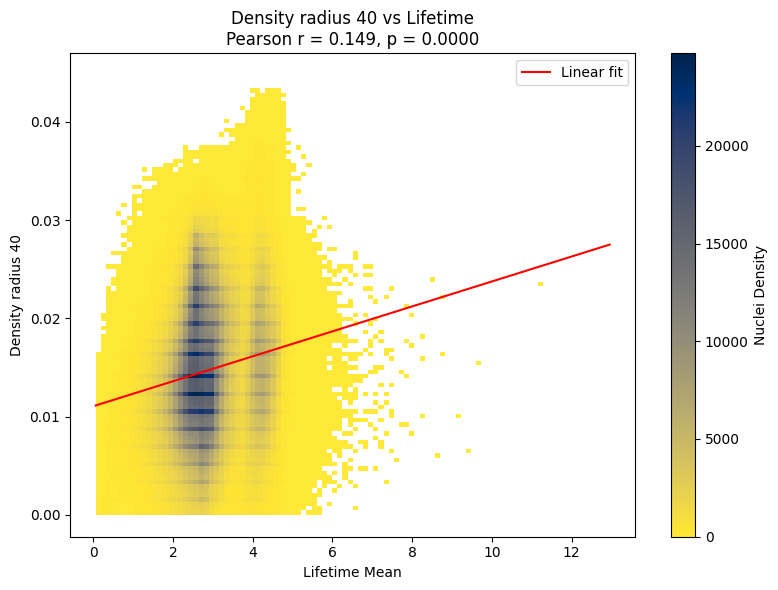

0.14930114180107132

In [3]:
# For density
plot_lifetime_correlation_with_density_map(full_tissue_features_df, "density_radius_40")

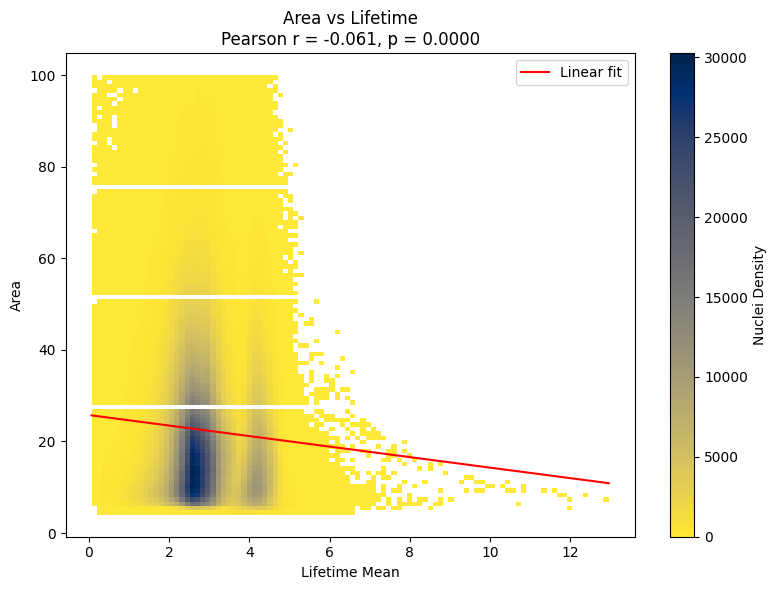

-0.06085163159495901

In [4]:
# For area
plot_lifetime_correlation_with_density_map(full_tissue_features_df, "area")

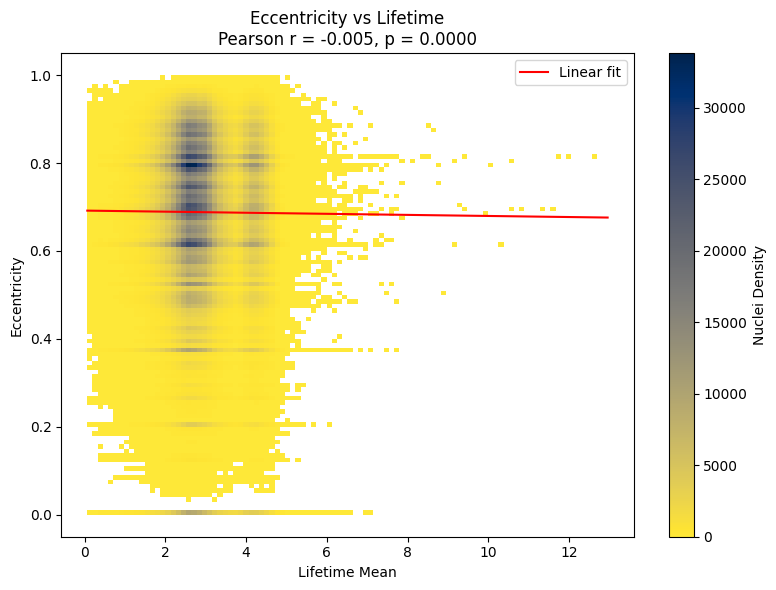

-0.005498556695199687

In [5]:

# For eccentricity
plot_lifetime_correlation_with_density_map(full_tissue_features_df, "eccentricity")

In [7]:
df_eccent = calcultae_lifetime_correlation_to_feature(full_tissue_features_df, 'eccentricity')
df_area = calcultae_lifetime_correlation_to_feature(full_tissue_features_df,  'area')
df_density = calcultae_lifetime_correlation_to_feature(full_tissue_features_df, 'density_radius_40')

df_correlation = pd.concat([df_eccent, df_area, df_density], axis=0)
df_correlation.head()


Median correlation of eccentricity: 0.010
Median correlation of area: 0.090
Median correlation of density_radius_40: 0.240


,feature_name,leap_ID,Correlation
0,eccentricity,015,-0.005500
1,eccentricity,017,0.006387
2,eccentricity,019,-0.014763
3,eccentricity,021,-0.020781
4,eccentricity,023,0.014913


In [9]:
output_corr_dir = os.path.join(
    const.base_dir, 'analysis', 'exploratory_data_analysis',
)

os.makedirs(output_corr_dir, exist_ok=True)

output_correlation_path = os.path.join(output_corr_dir, 'correlation_df_between_lifetime_and_morphological_density_features.csv')

df_correlation.to_csv(output_correlation_path, index=False)


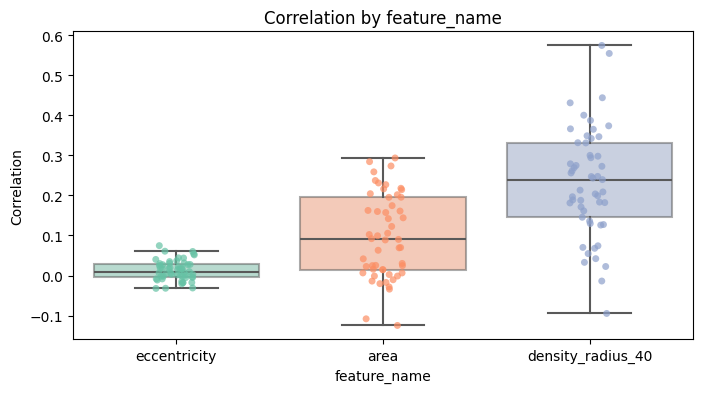

In [39]:
plt_fig = plot_boxplot_by_category(df_correlation, 'Correlation', category_col='feature_name', figsize=(8,4))


### Responder vs Non responder seperation by feature

In [2]:
df_median_file_path = os.path.join(const.full_tissue_dir, 'core', "features_median_data.csv")
median_df = pd.read_csv(df_median_file_path, dtype={'leap_ID': str})
median_df.head(2)

,leap_ID,lifetime_mean,area,extent,solidity,perimeter,diameter_area,convex_hull_area,minor_axis_length,perimeter_crofton,major_axis_length,orientation,diameter_max,eccentricity,density_radius_20,density_radius_40,density_radius_60,density_radius_80,category
0,015,3.915147,16.0,0.75,0.954545,12.242641,4.513517,17.0,3.669612,14.518306,5.449354,0.000000,5.385165,0.713180,0.007958,0.005769,0.005040,0.004526,non responder
1,017,4.177300,18.0,0.75,0.944444,13.656854,4.787307,20.0,3.991464,16.184387,6.065440,0.084918,6.324555,0.722862,0.019099,0.018104,0.016977,0.016015,non responder



T-statistic: 0.3573732421232969
P-value: 0.7225506490433115
eccentricity auc - 0.5152173913043478 



<module 'matplotlib.pyplot' from '/home/reutme/.conda/envs/flim_stardist/lib/python3.10/site-packages/matplotlib/pyplot.py'>

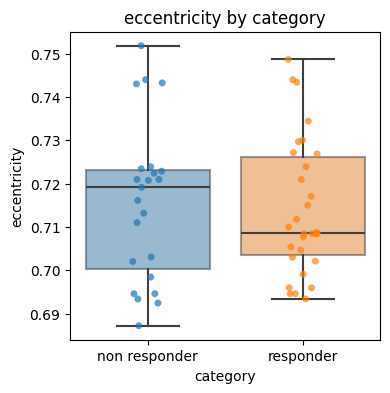

In [3]:
category_seperation_by_feature(median_df, 'eccentricity')


T-statistic: -1.044066270310289
P-value: 0.3019978688670676
area auc - 0.6253623188405798 



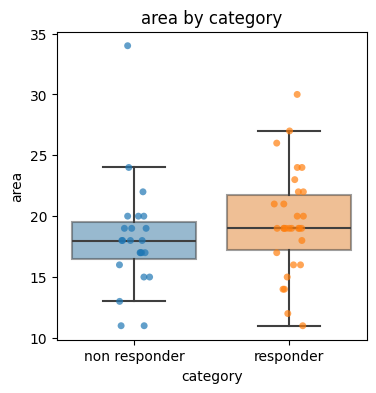

In [46]:
category_seperation_by_feature(median_df, 'area', mapping={'non responder': 0, 'responder': 1})


T-statistic: -0.8820241043676836
P-value: 0.38275128125620195
density_radius_40 auc - 0.5797101449275361 



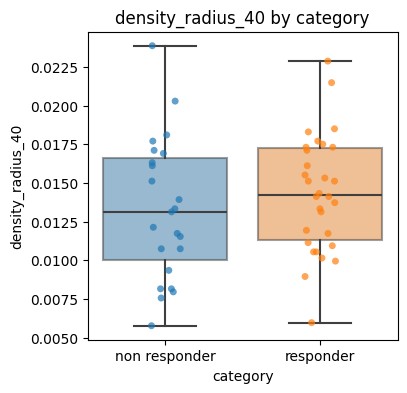

In [47]:
category_seperation_by_feature(median_df, 'density_radius_40', {'non responder': 0, 'responder': 1})


T-statistic: 1.4469930995669473
P-value: 0.15488698867166756
lifetime_mean auc - 0.6391304347826087 



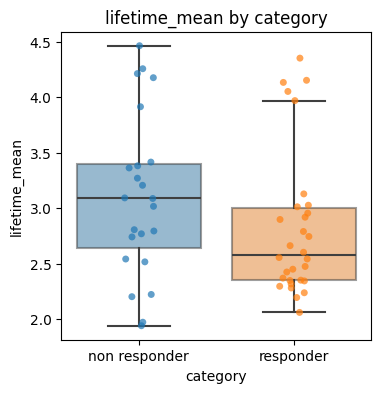

In [48]:
category_seperation_by_feature(median_df, 'lifetime_mean')